# Importing libraries.

In [1]:
import numpy as np 
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import math
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Importing DataSet

In [27]:
df = pd.read_csv('TAB_TEST_PY.csv')
Score = df['Scores']
hhi = df.loc[:,['RepDate_end','Scores']]
df

,RepDate_end,DealID,balance_deal_sum,mob,max_dpd_1,max_dpd_3,max_dpd_6,max_dpd_12,mnths_snc_dpd_gt_0,mnths_snc_dpd_gt_30,mnths_snc_dpd_gt_60,prc_of_month_with_DPD_grt_0_3_months,prc_of_month_with_DPD_grt_0_6_months,prc_of_month_with_DPD_grt_0_12_months,avg_bal_1_avg_bal_3,avg_bal_1_avg_bal_6,avg_bal_1_avg_bal_12,avg_bal_1_3_avg_bal_4_6,avg_arr_1_avg_bal_1,avg_arr_3_avg_bal_3,avg_arr_6_avg_bal_6,WOE_balance_deal_sum,WOE_mob,WOE_max_dpd_1,WOE_max_dpd_3,WOE_max_dpd_6,WOE_max_dpd_12,WOE_mnths_snc_dpd_gt_0,WOE_mnths_snc_dpd_gt_30,WOE_mnths_snc_dpd_gt_60,WOE_prc_of_month_with_DPD_grt_0_3_months,WOE_prc_of_month_with_DPD_grt_0_6_months,WOE_prc_of_month_with_DPD_grt_0_12_months,WOE_avg_bal_1_avg_bal_3,WOE_avg_bal_1_avg_bal_6,WOE_avg_bal_1_avg_bal_12,WOE_avg_bal_1_3_avg_bal_4_6,WOE_avg_arr_1_avg_bal_1,WOE_avg_arr_3_avg_bal_3,WOE_avg_arr_6_avg_bal_6,Scores,will_default
0,20190331,LD1710900620,0.4339,15,0,0,4,11,4,-9999,-9999,0.00,16.67,16.67,0.9347,0.8531,0.7305,0.8393,0.0,0.0,0.0000,0.160968,0,1.511698,1.756492,1.829682,0,0.908131,0.921639,0,1.547086,1.573645,1.504845,0.352501,0.052669,-0.070752,-0.010175,0.896511,1.119811,1.394433,742.333436,0
1,20190331,LD1820800442,0.3456,8,0,9,12,8,2,-9999,-9999,33.33,50.00,33.33,0.8037,0.6076,0.5035,0.6077,0.0,0.0,0.0249,0.160968,0,1.511698,-0.278307,-1.168636,0,0.908131,0.921639,0,1.547086,-0.916784,1.504845,0.352501,1.097772,0.934545,0.797666,0.896511,1.119811,-2.591505,671.732838,0
2,20190228,LD1727800430,0.7884,14,0,0,0,11,-9999,-9999,-9999,0.00,0.00,0.00,0.9828,0.9592,0.9168,0.9531,0.0,0.0,0.0000,-0.326372,0,1.511698,1.756492,1.829682,0,2.440646,0.921639,0,1.547086,1.573645,1.504845,0.352501,0.052669,-0.070752,-0.010175,0.896511,1.119811,1.394433,764.040507,0
3,20180731,LD1506300322,0.4322,7,4,4,16,7,0,-9999,-9999,100.00,100.00,100.00,0.9579,0.8949,0.8644,0.8766,0.0,0.0,0.0084,0.160968,0,-0.375362,-0.278307,-1.168636,0,-1.620506,0.921639,0,-2.293477,-2.535039,-2.587844,0.352501,0.052669,-0.070752,-0.010175,0.896511,1.119811,-2.591505,600.061729,0
4,20190331,LD1819900520,0.8075,8,0,0,0,8,-9999,-9999,-9999,0.00,0.00,0.00,0.9698,0.9284,0.8912,0.9182,0.0,0.0,0.0000,-0.326372,0,1.511698,1.756492,1.829682,0,2.440646,0.921639,0,1.547086,1.573645,1.504845,0.352501,0.052669,-0.070752,-0.010175,0.896511,1.119811,1.394433,764.040507,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310301,20181231,LD1727800550,0.6904,12,0,0,2,11,5,-9999,-9999,0.00,16.67,8.33,0.9662,0.9206,0.8452,0.9098,0.0,0.0,0.0000,0.160968,0,1.511698,1.756492,1.829682,0,0.908131,0.921639,0,1.547086,1.573645,1.504845,0.352501,0.052669,-0.070752,-0.010175,0.896511,1.119811,1.394433,742.333436,0
310302,20181231,LD1729600385,0.5815,12,0,0,0,11,-9999,-9999,-9999,0.00,0.00,0.00,0.9475,0.8797,0.7735,0.8664,0.0,0.0,0.0000,0.160968,0,1.511698,1.756492,1.829682,0,2.440646,0.921639,0,1.547086,1.573645,1.504845,0.352501,0.052669,-0.070752,-0.010175,0.896511,1.119811,1.394433,764.040507,0
310303,20180630,LD1705500030,0.6122,6,0,0,0,6,-9999,-9999,-9999,0.00,0.00,0.00,0.9582,0.9027,0.8859,0.8906,0.0,0.0,0.0000,0.160968,0,1.511698,1.756492,1.829682,0,2.440646,0.921639,0,1.547086,1.573645,1.504845,0.352501,0.052669,-0.070752,-0.010175,0.896511,1.119811,1.394433,764.040507,0
310304,20181130,LD1603200311,0.1937,11,0,0,0,11,-9999,-9999,-9999,0.00,0.00,0.00,0.8623,0.7182,0.5451,0.7137,0.0,0.0,0.0000,0.160968,0,1.511698,1.756492,1.829682,0,2.440646,0.921639,0,1.547086,1.573645,1.504845,0.352501,1.097772,0.934545,0.797666,0.896511,1.119811,1.394433,800.419077,0


In [3]:

lolframe = df.iloc[:,21:40]
k = lolframe.columns[:-2].tolist()
joj = lolframe.copy()
lolframe['WOE_balance_deal_sum'].fillna(lolframe['WOE_balance_deal_sum'].mean(),inplace = True)
for i in lolframe.columns:
    lolframe[i] = lolframe[i].apply(lambda x:str(x))
lolframe = pd.get_dummies(lolframe,prefix_sep =':')
lolframe = pd.concat([lolframe,df['RepDate_end'],df['will_default']],axis = 1)

In [4]:
df['RepDate_end'] = pd.to_datetime(df['RepDate_end'],format='%Y%m%d', errors='ignore')
df['RepDate_end'] = df['RepDate_end'].apply(str)
df['RepDate_end'] = df['RepDate_end'].apply(lambda x:x.split(' 00')[0])

In [5]:
df1 = df.iloc[:,0:21]
df = pd.concat([df['will_default'],df1],axis = 1)

In [6]:
df['balance_deal_sum'].fillna(df['balance_deal_sum'].median(),inplace = True)

# PD model creation

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , RepeatedStratifiedKFold , cross_val_score , RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix , f1_score ,roc_auc_score ,classification_report , roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc

In [8]:
X = df.drop(['will_default','RepDate_end','DealID'],axis = 1)
y = df['will_default']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
model = LogisticRegression(max_iter=975, class_weight = 'balanced',penalty = 'l2',solver = 'lbfgs',C = 1000).fit(X_train,y_train)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
scores = cross_val_score(model,X_train, y_train, scoring = 'roc_auc', cv = cv)

In [10]:
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1
AUROC , GINI

(0.9235450295611213, 0.8470900591222426)

In [11]:
y_pred = model.predict(X_test)
roc_auc_score(y_test,y_pred)

0.8662030971335124

# Ginni month distribution and feature importance

For 2018-05-31 month we have roc_auc_score 0.7108524192051942
For 2018-06-30 month we have roc_auc_score 0.71275480452953
For 2018-07-31 month we have roc_auc_score 0.7089646948539721
For 2018-08-31 month we have roc_auc_score 0.740832500492113
For 2018-09-30 month we have roc_auc_score 0.7255425432836682
For 2018-10-31 month we have roc_auc_score 0.7323669534288202
For 2018-11-30 month we have roc_auc_score 0.7372701311252019
For 2018-12-31 month we have roc_auc_score 0.7525332180232667
For 2019-01-31 month we have roc_auc_score 0.7407863980267648
For 2019-02-28 month we have roc_auc_score 0.7166181039863235
For 2019-03-31 month we have roc_auc_score 0.735743388028093
For 2019-04-30 month we have roc_auc_score 0.719978700656221


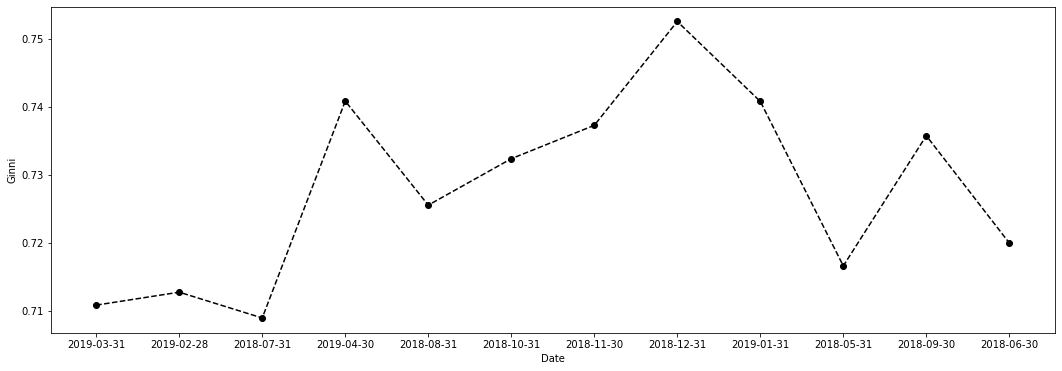

In [12]:
def ginni(df,z,X_train,rotation):
    dict = {}
    sorted_date =  sorted(df[z].unique())
    scores = []
    job = df.copy()
    job = df.drop(['RepDate_end','DealID'],axis = 1)
    complete = pd.DataFrame(columns = X_train.columns.values)
    
    for i in sorted_date: 
        
        dict[i] = [x for x in df.loc[df[z] == i].index]
        
        
        clon = pd.DataFrame(data = job , index = dict[i][0:])
        
        X_train = clon.drop('will_default',axis = 1)
        y_train = clon['will_default']
        y_pred = model.predict(X_train)
        roc_auc = roc_auc_score(y_train,y_pred)
        GINI = roc_auc*2 - 1
        scores.append(GINI)
        
        print(f'For {i} month we have roc_auc_score {GINI}')
        #a = model.coef_[0]
        #j = pow(math.e, a)
        #feature_importance = pd.DataFrame(columns = X_train.columns.values)
        #df2 = pd.DataFrame([j],columns=feature_importance.columns)
        #final_df = pd.concat([feature_importance,df2])
        
        
       
        #new_row = {}
        #for g in final_df.columns.values:
                    #new_row[g] = final_df[g][0]

      
        #complete = complete.append(new_row,ignore_index = True)

    x = np.array(df['RepDate_end'].unique())
    y = np.array(scores)
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker = 'o',linestyle = '--',color = 'k')
    plt.xlabel('Date')
    plt.ylabel('Ginni')
    plt.xticks(rotation = rotation)
    
    
        
#feature_importance = pd.DataFrame(columns = ['Feature name'], data = X_train.columns.values)
#feature_importance['Coefficient'] = model.coef_[0]
#feature_importance["importance"] = pow(math.e, feature_importance['Coefficient'])
#feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)

#ax = feature_importance.plot.barh(x='Feature name', y='importance')
#plt.show()


ginni(df,'RepDate_end',X_train,0)

# Dashboard distribution 

In [13]:
dist1= pd.concat([Score,df['will_default']],axis = 1)
dist1.columns = ['Score','Status']
dist1 = dist1.reset_index(False)
dist = dist1.iloc[:,[1,2]]
score = round(Score)

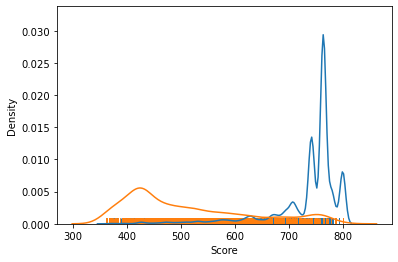

<Figure size 1152x648 with 0 Axes>

In [14]:
def dashboard(min1,max1,cut):
    list = [int(x) for x in np.linspace(min1,max1,cut)]
    for i in range(len(list)):
        if i < cut-1:
                a = (list[i]+list[i+1])/2
                dist.loc[dist['Score'].isin(range(list[i],list[i+1])),'Score'] = a
                i = i + 1
                 
    dist['Score'] = round(dist['Score'],0)
    
    unique_vals = dist['Status'].unique()  
    targets = [dist.loc[dist['Status'] == val] for val in unique_vals]
    
    for target in targets:
        sns.distplot(target[['Score']], hist=False, rug=True)
    plt.ylabel('Density')
    plt.xlabel('Score')
    
    plt.figure(figsize=(16,9))
    
 
dashboard(361,801,100) 

# PSI for every month

In [22]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 100
def PSI_m(df,z,joj):
    dict = {}
    sorted_date =  sorted(df[z].unique())
    df = pd.concat([df,Score],axis = 1)
    k = joj.columns[:-2].tolist()
    complete = pd.DataFrame(columns = k)
    list = [int(x) for x in np.linspace(300,850,20)]
    for i in sorted_date: 
    
        
        dict[i] = [x for x in df.loc[df[z] == i].index]
        actual = pd.DataFrame(data = df.iloc[:,:-3] , index = dict[i][0:])
        clon = [x for x in sorted_date if x is not i]
        old = df.loc[df[z].isin(clon)]
        old = old.iloc[:,:-3]
        
        

        #for f in range(len(list)):
         #   if f < 19:
          #      actual[f] = np.where((actual['Scores'] >= list[f] ) & (actual['Scores'] < list[f+1]), 1, 0)
           #     old[f] = np.where((old['Scores'] >= list[f] ) & (old['Scores'] < list[f+1]), 1, 0)
            #    f = f + 1
        #old = old.drop('Scores',axis = 1)
        #actual = actual.drop('Scores',axis = 1)
        
        PSI_calc_train = old.sum() / old.shape[0]
        PSI_calc_new =   actual.sum()/ actual.shape[0]
       
        
        PSI = pd.concat([PSI_calc_train,PSI_calc_new],axis = 1)
        PSI = PSI.reset_index()
        PSI.columns = ['index', 'Proportions_Train', 'Proportions_New']
        #return PSI_calc_train
        PSI['Original_name'] = PSI['index'].str.split(':').str[0]
        PSI = PSI[np.array(['index', 'Original_name', 'Proportions_Train', 'Proportions_New'])]
        PSI = PSI[(PSI['index'] != 'Intercept')]

        PSI['Contribution'] = np.where((PSI['Proportions_Train'] == 0) | (PSI['Proportions_New'] == 0),
                                       0, (PSI['Proportions_New'] - PSI['Proportions_Train']) * np.log(PSI['Proportions_New'] / PSI['Proportions_Train'])) 
        PSI_summary = PSI.groupby('Original_name')['Contribution'].sum()
        
     
        j = PSI_summary.tolist()
        k = PSI_summary.index.tolist()
         
        final_df = pd.DataFrame(columns = k)
        df2 = pd.DataFrame([j],columns=k)
        new_row = {}
        
        for num,p in enumerate(final_df.columns.values):
                    
                new_row[p] = j[num]
        
        complete = complete.append(new_row,ignore_index = True)
    complete.insert(0,'Date',sorted_date)
    complete['Date'] = pd.to_datetime(complete['Date'],format = '%Y%m%d')
    return complete
PSI_m(lolframe,'RepDate_end',joj)

,Date,WOE_balance_deal_sum,WOE_mob,WOE_max_dpd_1,WOE_max_dpd_3,WOE_max_dpd_6,WOE_max_dpd_12,WOE_mnths_snc_dpd_gt_0,WOE_mnths_snc_dpd_gt_30,WOE_mnths_snc_dpd_gt_60,WOE_prc_of_month_with_DPD_grt_0_3_months,WOE_prc_of_month_with_DPD_grt_0_6_months,WOE_prc_of_month_with_DPD_grt_0_12_months,WOE_avg_bal_1_avg_bal_3,WOE_avg_bal_1_avg_bal_6,WOE_avg_bal_1_avg_bal_12,WOE_avg_bal_1_3_avg_bal_4_6,WOE_avg_arr_1_avg_bal_1,WOE_avg_arr_3_avg_bal_3,WOE_avg_arr_6_avg_bal_6
0,2018-05-31,0.000498,0.0,0.000831,0.000235,0.001076,0.0,0.060723,0.002610,0.0,0.000123,0.000819,0.017188,0.100530,0.114524,0.281290,0.110256,0.000383,0.000266,0.000749
1,2018-06-30,0.000846,0.0,0.000163,0.000321,0.000454,0.0,0.026472,0.001516,0.0,0.000341,0.000156,0.007792,0.058239,0.092620,0.151420,0.092788,0.000009,0.000153,0.000261
2,2018-07-31,0.002299,0.0,0.000096,0.000929,0.000356,0.0,0.010219,0.000645,0.0,0.000204,0.000155,0.025072,0.030275,0.061721,0.067984,0.055740,0.000029,0.000069,0.000098
3,2018-08-31,0.002755,0.0,0.002083,0.001199,0.000749,0.0,0.004153,0.000206,0.0,0.000211,0.000461,0.010842,0.005450,0.031365,0.057976,0.023785,0.001095,0.000623,0.000335
4,2018-09-30,0.001622,0.0,0.001748,0.001432,0.001464,0.0,0.002564,0.000024,0.0,0.001083,0.000776,0.005790,0.000015,0.007955,0.019778,0.001257,0.002154,0.001761,0.001830
5,2018-10-31,0.000437,0.0,0.001522,0.001951,0.001731,0.0,0.001827,0.000190,0.0,0.001675,0.000903,0.012150,0.009558,0.014387,0.008670,0.011350,0.000028,0.001428,0.000477
6,2018-11-30,0.001801,0.0,0.000414,0.000555,0.000503,0.0,0.001068,0.000205,0.0,0.000380,0.000272,0.001379,0.028474,0.034932,0.013583,0.037006,0.000424,0.000149,0.000120
7,2018-12-31,0.030588,0.0,0.001342,0.000569,0.000062,0.0,0.004317,0.000205,0.0,0.000160,0.000107,0.001360,0.024463,0.049609,0.035717,0.051314,0.000263,0.000612,0.000049
8,2019-01-31,0.017948,0.0,0.003171,0.000385,0.000430,0.0,0.004780,0.000251,0.0,0.000297,0.000016,0.001316,0.037380,0.067861,0.042529,0.059247,0.002607,0.001571,0.000067
9,2019-02-28,0.018368,0.0,0.004992,0.001887,0.000449,0.0,0.014622,0.000180,0.0,0.000800,0.000314,0.001697,0.023294,0.061965,0.052074,0.064445,0.000005,0.000700,0.000451


# HHI

In [26]:
hhi['New_Score'] = 0
def hhi1(min1,max1,cut):
    list = [int(x) for x in np.linspace(min1,max1,cut)]
    for i in range(len(list)):
            
            if i < cut-1:
                    a = (list[i]+list[i+1])/2
                    
                    hhi.loc[hhi['Scores'].between(list[i],list[i+1]),'New_Score'] = a 
                    
                    i = i + 1
    return hhi
    
hhi1(360,801,10)

hhi['New_Score'] = round(hhi['New_Score'],0)
hhi1 = hhi.groupby(["RepDate_end","New_Score"]).count()
hhi2 = hhi.groupby(["RepDate_end"])["New_Score"].count()
hhi

,RepDate_end,Scores,New_Score
0,20190331,742.333436,728.0
1,20190331,671.732838,678.0
2,20190228,764.040507,776.0
3,20180731,600.061729,580.0
4,20190331,764.040507,776.0
...,...,...,...
310301,20181231,742.333436,728.0
310302,20181231,764.040507,776.0
310303,20180630,764.040507,776.0
310304,20181130,800.419077,776.0


In [29]:
pd.cut(hhi['Scores'],10)

0          (712.44, 756.429]
1           (668.45, 712.44]
2         (756.429, 800.419]
3           (580.47, 624.46]
4         (756.429, 800.419]
                 ...        
310301     (712.44, 756.429]
310302    (756.429, 800.419]
310303    (756.429, 800.419]
310304    (756.429, 800.419]
310305     (712.44, 756.429]
Name: Scores, Length: 310306, dtype: category
Categories (10, interval[float64]): [(360.082, 404.511] < (404.511, 448.501] < (448.501, 492.491] < (492.491, 536.481] ... (624.46, 668.45] < (668.45, 712.44] < (712.44, 756.429] < (756.429, 800.419]]

In [31]:
def hhil(firm_rev, m_rev):

    firm_rev = firm_rev.reset_index()
    m_size = m_rev.reset_index()
    complete = pd.DataFrame(columns = ['RepDate_end','Whole Concentration'])

    m_size.rename(columns={'RepDate_end': 'RepDate_end', 'New_Score': 'NS'}, inplace=True)
    firm_rev.rename(columns={'RepDate_end': 'RepDate_end', 'New_Score': 'NS','Scores': 'Amount'}, inplace=True)
    for i in firm_rev['RepDate_end'].unique():   
            test = pd.DataFrame(firm_rev.loc[firm_rev['RepDate_end'] == i])
            test['pop'] = test['Amount'] / test['Amount'].sum()
            test['Concentration'] = test['pop']**2
            test['Whole Concentration'] = test['Concentration'].sum()
            
            test = test.iloc[:,[0,5]][:1]
            complete = pd.concat([complete,test],axis = 0)
    #return test
    complete['RepDate_end'] = pd.to_datetime(complete['RepDate_end'], format = '%Y%m%d')
    return complete       

hhil(hhi1, hhi2)

,RepDate_end,Whole Concentration
0,2018-05-31,0.380424
9,2018-06-30,0.382858
18,2018-07-31,0.380926
27,2018-08-31,0.373473
36,2018-09-30,0.373962
45,2018-10-31,0.380048
54,2018-11-30,0.392867
63,2018-12-31,0.406203
72,2019-01-31,0.391563
81,2019-02-28,0.404981


# Train Sample 10 dummies of Score:
6. Based on the Train sample define the intervals for 10 score groups (the interval width is defined as (max(score)-min(score))/10 so that we have, for instance 0-100, 100-200 … 900-1000) - reference intervals and reference shares

In [ ]:
X_train 

# END 

In [ ]:
X_new.columns.values[X_new.shape[1] - 1] = 'Score'
first.columns.values[first.shape[1] - 1] = 'Score'

In [ ]:
X_new['Score:350-400'] = np.where((X_new['Score'] >= 351) & (X_new['Score'] < 400), 1, 0)
X_new['Score:400-450'] = np.where((X_new['Score'] >= 400) & (X_new['Score'] < 450), 1, 0)
X_new['Score:450-500'] = np.where((X_new['Score'] >= 450) & (X_new['Score'] < 500), 1, 0)
X_new['Score:500-550'] = np.where((X_new['Score'] >= 500) & (X_new['Score'] < 550), 1, 0)
X_new['Score:550-600'] = np.where((X_new['Score'] >= 550) & (X_new['Score'] < 600), 1, 0)
X_new['Score:600-650'] = np.where((X_new['Score'] >= 600) & (X_new['Score'] < 650), 1, 0)
X_new['Score:650-700'] = np.where((X_new['Score'] >= 650) & (X_new['Score'] < 700), 1, 0)
X_new['Score:700-750'] = np.where((X_new['Score'] >= 700) & (X_new['Score'] < 750), 1, 0)
X_new['Score:750-800'] = np.where((X_new['Score'] >= 750) & (X_new['Score'] < 800), 1, 0)

# We create dummy variables for score intervals in the dataframe with old ("expected").

In [ ]:
first['Score:300-350'] = np.where((first['Score'] >= 300) & (first['Score'] < 351), 1, 0)
first['Score:350-400'] = np.where((first['Score'] >= 351) & (first['Score'] < 400), 1, 0)
first['Score:400-450'] = np.where((first['Score'] >= 400) & (first['Score'] < 450), 1, 0)
first['Score:450-500'] = np.where((first['Score'] >= 450) & (first['Score'] < 500), 1, 0)
first['Score:500-550'] = np.where((first['Score'] >= 500) & (first['Score'] < 550), 1, 0)
first['Score:550-600'] = np.where((first['Score'] >= 550) & (first['Score'] < 600), 1, 0)
first['Score:600-650'] = np.where((first['Score'] >= 600) & (first['Score'] < 650), 1, 0)
first['Score:650-700'] = np.where((first['Score'] >= 650) & (first['Score'] < 700), 1, 0)
first['Score:700-750'] = np.where((first['Score'] >= 700) & (first['Score'] < 750), 1, 0)
first['Score:750-800'] = np.where((first['Score'] >= 750) & (first['Score'] < 800), 1, 0)
first['Score:800-850'] = np.where((first['Score'] >= 800) & (first['Score'] <= 850), 1, 0)
# We create dummy variables for score intervals in the dataframe with new ("actual").

In [ ]:
PSI_calc_train = first.sum() / first.shape[0]
PSI_calc_new = X_new.sum() / X_new.shape[0]

In [ ]:
PSI = pd.concat([PSI_calc_train,PSI_calc_new],axis = 1)
PSI = PSI.reset_index()
PSI.columns = ['index', 'Proportions_Train', 'Proportions_New']
PSI['Original_name'] = PSI['index'].str.split(':').str[0]
PSI = PSI[np.array(['index', 'Original_name', 'Proportions_Train', 'Proportions_New'])]
PSI = PSI[(PSI['index'] != 'Intercept')]

PSI['Contribution'] = np.where((PSI['Proportions_Train'] == 0) | (PSI['Proportions_New'] == 0),
                               0, (PSI['Proportions_New'] - PSI['Proportions_Train']) * np.log(PSI['Proportions_New'] / PSI['Proportions_Train']))

# CREATING SCORECARD

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = X_train.columns.values)
summary_table['Coefficients'] = model.coef_.reshape(84,1)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', model.intercept_[0]]
summary_table.sort_index(inplace = True)

In [ ]:
summary_table

In [ ]:
y_hat_test = model.predict(X_test)
y_hat_test_proba = model.predict_proba(X_test) 
y_hat_test_proba = y_hat_test_proba[: , 1]

In [ ]:
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [ ]:
y_test_proba

In [ ]:
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba']
y_test_proba.index = X_test.index
y_test_proba

In [ ]:
tr = 0.5
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
confusion_matrix(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'], normalize = 'all')

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [ ]:
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
GINI = AUROC*2 - 1
AUROC , GINI

In [ ]:
no_skill = len(y_test[y_test == 1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [ ]:
auc_pr = auc(recall, precision)
auc_pr

In [ ]:
df_scorecard = summary_table.copy()
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [ ]:
min_score = 1
max_score = 751

min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard.loc[0, 'Score - Calculation'] = ((df_scorecard.loc[0,'Coefficients'] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

In [ ]:
df_scorecard.loc[0, 'Score - Calculation']

In [ ]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
print(min_sum_score_prel)
print(max_sum_score_prel)

In [ ]:
score_card = df_scorecard.iloc[:,[0,4]]

In [ ]:
score_card

In [ ]:
X_test.insert(0, 'Intercept', 1)
y_scores = X_test.dot(score_card['Score - Preliminary'].values)

In [ ]:
y_scores

# HHI TEST (Herhindahl

In [ ]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [ ]:
df_cutoffs.head()

In [ ]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [ ]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [ ]:
df_cutoffs['Score'][0] = max_score

In [ ]:
def n_approved(p):
    return np.where(y_test_proba['y_hat_test_proba'] >= p, 1, 0).sum()

In [ ]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = y_test_proba['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / y_test_proba['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [ ]:
df_cutoffs

In [ ]:
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold: %f' % (best_thresh))

In [ ]:
df_cutoffs.loc[df_cutoffs['thresholds'].between(0.27788,0.277890)]

In [ ]:
###CUT OF IS 490

#df_scorecard.to_csv('df_scorecard.csv')